# Sprint de IA – Modelo Baseline

In [1]:
# Instalación de librerías necesarias (solo si se ejecuta en entorno limpio)
!pip install pandas matplotlib scikit-learn seaborn --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# CARGA DE LOGS

import pandas as pd  

# Cargar logs del antivirus
path = "C:/Users/alons/Desktop/Tesis_SIEM_ML/data/raw/Logs-antivirus_etiquetado.csv"
logs_df = pd.read_csv(path)

# Revisión inicial
logs_df.info()
logs_df['danger.type'].value_counts()
# Quitar saltos de línea y espacios
logs_df['danger.type'] = logs_df['danger.type'].str.strip().str.replace(r'[\n\r]', '', regex=True)

# Etiquetas consideradas maliciosas
maliciosos = ['Troyano', 'Virus']

# Clasificar como 1 si contiene palabra clave maliciosa
logs_df['Etiqueta_Binaria'] = logs_df['danger.type'].apply(
    lambda x: 1 if any(mal in x for mal in maliciosos) else 0
)

logs_df['Etiqueta_Binaria'].value_counts()
logs_df.to_csv("C:/Users/alons/Desktop/Tesis_SIEM_ML/data/processed/logs_antivirus_limpio.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   @timestamp        6285 non-null   object
 1   host.ip           6285 non-null   object
 2   host.hostname     6285 non-null   object
 3   rule.name         6285 non-null   object
 4   rule.category     6285 non-null   object
 5   rule.description  6285 non-null   object
 6   file.path         6285 non-null   object
 7   file.hash.md5     6285 non-null   object
 8   file.hash.sha256  6285 non-null   object
 9   danger.type       6285 non-null   object
 10  virus.name        6285 non-null   object
dtypes: object(11)
memory usage: 540.2+ KB


In [15]:
# CARGA DE DATOS LIMPIOS

import pandas as pd

# Ruta al archivo limpio
file_path = "C:/Users/alons/Desktop/Tesis_SIEM_ML/data/processed/logs_antivirus_limpio.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas
df.head()

,@timestamp,host.ip,host.hostname,rule.name,rule.category,rule.description,file.path,file.hash.md5,file.hash.sha256,danger.type,virus.name,Etiqueta_Binaria
0,"Sep 29, 2024 @ 12:06:47.000",10.5.32.38,93243-000582510,GNRL_EV_VIRUS_FOUND,Análisis AREA 2DA ZONA NAVAL,Se ha detectado un software legítimo que los i...,D:\\$RECYCLE.BIN\\S-1-5-21-117609710-200047835...,7EB812B2E9D7AFC5EA2E65D9D01524C8,96BA1D40EB85F60A20224E199C18126B160FE165E727B7...,Software,not-a-virus:RiskTool.Win64.MicRecorder.a,0
1,"Sep 27, 2024 @ 12:06:15.000",10.5.91.70,93424-037700416,GNRL_EV_VIRUS_FOUND,Protección frente a amenazas en archivos,Objeto malicioso detectado,F:\\CHECHE\\CHECHE Copy.lnk,64E3BCF8A472761224F5C64BCE400411,601679C07EB0F22D922AAE55E1D8EBC465DADB357F5DEC...,Troyano,HEUR:Trojan.WinLNK.Agent.gen,1
2,"Sep 27, 2024 @ 07:56:15.000",10.4.236.169,60041-091685007,GNRL_EV_VIRUS_FOUND,Prevención de exploits,Objeto malicioso detectado,C:\\Windows\\Temp\\fstmp\\fs_action_51952_body...,5277A4B627CF3BB0639ED98982D2AF05,3DD8FD711452FB49A02E50853D6F6D202CC5506BFE6E0F...,Troyano,PDM:Trojan.Win32.Generic,1
3,"Sep 27, 2024 @ 07:56:15.000",10.4.236.169,60041-091685007,GNRL_EV_VIRUS_FOUND,Detección de comportamiento,Objeto malicioso detectado,C:\\Windows\\Temp\\fstmp\\fs_action_51952_body...,5277A4B627CF3BB0639ED98982D2AF05,3DD8FD711452FB49A02E50853D6F6D202CC5506BFE6E0F...,Troyano,PDM:Trojan.Win32.Generic.nblk,1
4,"Sep 26, 2024 @ 16:52:33.000",10.5.74.12,10101-014840002,GNRL_EV_VIRUS_FOUND,Protección frente a amenazas en archivos,Objeto malicioso detectado,G:\\BACKUP'S\\BACKUPS OFICINAS GOE-3 2023\\PC ...,06171258B83BC183E1DB1B805C368852,B43DA1A6418A7C8B514CA80C7EDD9599667BA62EE19A78...,Troyano,Trojan.Win32.AHRun.gen,1


In [16]:
# Limpieza de columnas categóricas
cat_columns = df.select_dtypes(include='object').columns.tolist()
df[cat_columns] = df[cat_columns].astype('category')

# Codificación de variables categóricas
df_encoded = df.copy()
for col in cat_columns:
    df_encoded[col] = df_encoded[col].cat.codes

# Mostrar columnas transformadas
df_encoded.head()

,@timestamp,host.ip,host.hostname,rule.name,rule.category,rule.description,file.path,file.hash.md5,file.hash.sha256,danger.type,virus.name,Etiqueta_Binaria
0,5219,211,170,0,0,3,1465,643,772,37,421,0
1,5218,227,190,0,9,2,3442,515,503,43,243,1
2,5217,123,127,0,7,2,1440,422,321,43,310,1
3,5217,123,127,0,4,2,1440,422,321,43,311,1
4,5216,218,0,0,9,2,3682,29,928,43,334,1


Accuracy del modelo: 0.9793

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       685
           1       0.98      0.98      0.98      1201

    accuracy                           0.98      1886
   macro avg       0.98      0.98      0.98      1886
weighted avg       0.98      0.98      0.98      1886



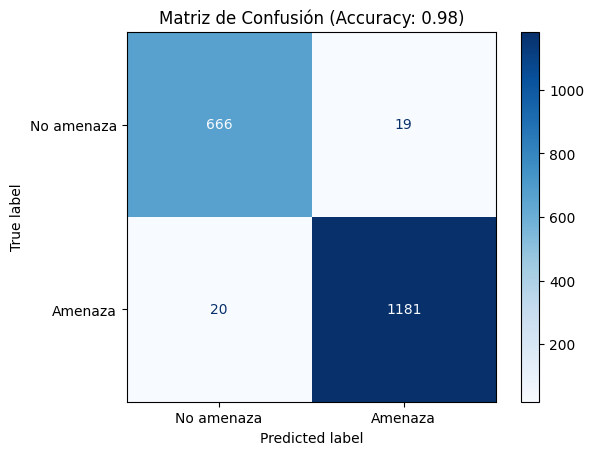

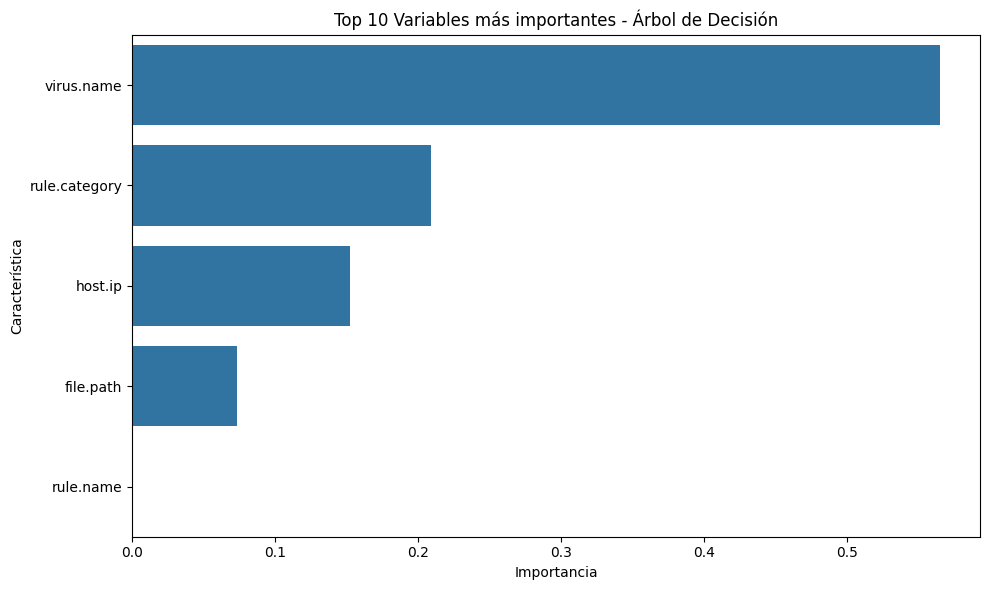

['C:/Users/alons/Desktop/Tesis_SIEM_ML/models/Arbol_de_Decision_model_antivirus.pkl']

In [24]:
# ENTRENAMIENTO DE ÁRBOL DE DECISIÓN 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib


# 2. Cargar dataset limpio
df = pd.read_csv("C:/Users/alons/Desktop/Tesis_SIEM_ML/data/processed/logs_antivirus_limpio.csv")

# 3. Seleccionar las 5 columnas específicas + etiqueta
selected_cols = ["host.ip", "host.hostname", "rule.name", "rule.category", "rule.description", "file.path", "file.hash.md5", "file.hash.sha256", "danger.type", "virus.name"]

# 4. Convertir columnas seleccionadas a tipo 'category'
df[selected_cols] = df[selected_cols].astype("category")

# 5. Codificar categorías con .cat.codes
df_encoded = df.copy()
for col in selected_cols:
    df_encoded[col] = df_encoded[col].cat.codes

# División de variables predictoras y variable objetivo
X = df_encoded[["host.ip", "rule.name", "rule.category", "file.path", "virus.name"]]
y = df_encoded["Etiqueta_Binaria"]

# División en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo base: Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualización: Matriz de Confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No amenaza", "Amenaza"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión (Accuracy: {accuracy:.2f})")
plt.show()

# Importancia de variables - Árbol de Decisión
# Extraer importancias y nombres de características
importances = modelo.feature_importances_

# Crear DataFrame para ordenar y visualizar
importancia_df = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False).head(10)

# Graficar
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['text.usetex'] = False
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Característica')
plt.title("Top 10 Variables más importantes - Árbol de Decisión")
plt.tight_layout()
plt.show()

# Guardar modelo entrenado
joblib.dump(modelo, "C:/Users/alons/Desktop/Tesis_SIEM_ML/models/Arbol_de_Decision_model_antivirus.pkl")

Random Forest - Accuracy: 0.9976133651551312
=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       455
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



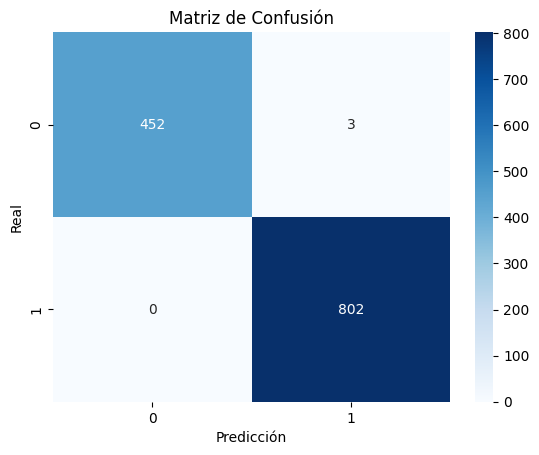

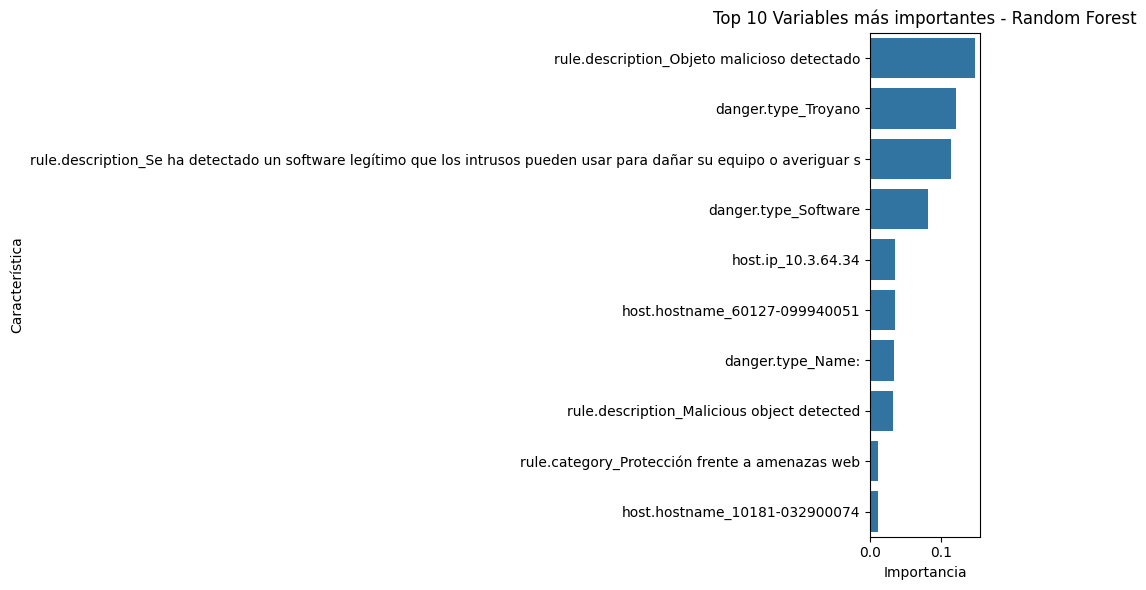

['C:/Users/alons/Desktop/Tesis_SIEM_ML/models/Random_Forest_Model_Antivirus.pkl']

In [25]:
# ENTRENAMIENTO DE RANDOM FOREST

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Cargar dataset limpio
file_path = "C:/Users/alons/Desktop/Tesis_SIEM_ML/data/processed/logs_antivirus_limpio.csv"
df = pd.read_csv(file_path)

# Selección de variables predictoras
X = df[["host.ip", "host.hostname", "rule.name", "rule.category", "rule.description", "file.path", "file.hash.md5", "file.hash.sha256", "danger.type", "virus.name"]]
X = X.fillna("desconocido")  # Reemplazar valores nulos

# Codificación de variables categóricas (One-Hot Encoding)
X_encoded = pd.get_dummies(X)

# Variable objetivo
y = df['Etiqueta_Binaria']

# División de datos entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))

# Evaluación del modelo
print("=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Importancia de variables - Random Forest
# Extraer importancias y nombres de características
importances = rf_model.feature_importances_
features = X_encoded.columns  # Asegúrate de usar X_encoded, que es lo que entrenaste

# Crear DataFrame para ordenar y visualizar
importancia_df = pd.DataFrame({
    'Característica': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False).head(10)

# Graficar
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['text.usetex'] = False
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Característica')
plt.title("Top 10 Variables más importantes - Random Forest")
plt.tight_layout()
plt.show()

# Guardar modelo entrenado
joblib.dump(rf_model, "C:/Users/alons/Desktop/Tesis_SIEM_ML/models/Random_Forest_Model_Antivirus.pkl")

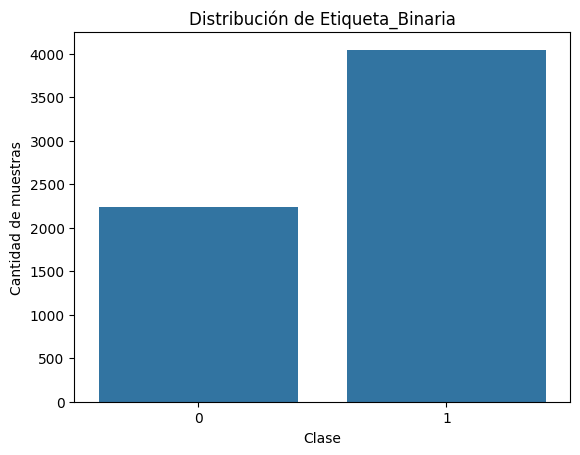

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la distribución de la etiqueta
sns.countplot(data=df_encoded, x='Etiqueta_Binaria')
plt.title('Distribución de Etiqueta_Binaria')
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.show()